In [3]:
# WEEK -6

In [4]:
import numpy as np

##### BERNOULLI NAIVE BAYES IMPLEMENTATION

In [5]:
# class conditional density estimation and prior

In [6]:
?np.expand_dims

In [7]:
class BernoulliNBPractice:
    def __init__(self,alpha=1.0):
        self.alpha=alpha
    def fit(self,x,y):
        n_samples,n_features=x.shape
        classes=np.unique(y)
        n_classes=len(classes)
        self.w=np.zeros((n_classes,n_features))
        self.w_priors=np.zeros(n_classes)
        for c in range(n_classes):
            X_c=x[y==c]
            self.w[c,:]=(np.sum(X_c,axis=0)+self.alpha)/(X_c.shape[0]+2*self.alpha)
            self.w_priors[c]=(X_c.shape[0]+self.alpha)/(n_samples+n_classes*self.alpha)
        print("Conditional densities :",self.w)
        print("Priors :",self.w_priors)
    def log_likelihood_prior(self,x):
        self.log_numerator=x@(np.log(self.w).T)+(1-x)@(np.log(1-self.w))+np.log(self.w_priors)
        return self.log_numerator
    def predict(self,x):
        return np.argmax(self.log_numerator,axis=1)
    def predict_proba(self,x):
        
        self.probabilities=np.exp(self.log_numerator)/np.expand_dims(np.sum(np.exp(self.log_numerator),axis=1),axis=1)
        return self.probabilities

In [8]:
def fit(x,y):
    n_samples,n_features=x.shape
    class_count=np.unique(y)
    n_classes=len(class_count)
    # Weight initialization
    w=np.zeros((n_classes,n_features),dtype=np.float64)
    w_priors=np.zeros(n_classes,dtype=np.float64)
    
    for c in range(n_classes):#processing examples from each class separately
        X_c=x[y==c] # get examples with class label = c
        
        #estimation of w_{jy_c}: The parameter of Bermoulli distribution
        #p(x_j|y_c) ~ Ber(w_{jy_c})
        # We have vectorized this oeration and we obtain vector w_{y_c} that
        # contains w_{jy_c} for eacj x_j
        w[c,:]=np.sum(X_c,axis=0)/X_c.shape[0]
        #estimation of prior probabilty: w_{y_c}
        w_priors[c]=X_c.shape[0]/float(n_samples)
    print("Weight vector:",w)
    print("Prior: ",w_priors)
    return w,w_priors

In [9]:
x=np.array([[1,0],[0,1],[0,1],[1,0]])
y=np.array([1,0,0,1])
fit(x,y)

Weight vector: [[0. 1.]
 [1. 0.]]
Prior:  [0.5 0.5]


(array([[0., 1.],
        [1., 0.]]),
 array([0.5, 0.5]))

In [10]:
BernoulliNBPractice(alpha=0).fit(x,y)

Conditional densities : [[0. 1.]
 [1. 0.]]
Priors : [0.5 0.5]


In [11]:
# filtering examples for a class , say class 1
x_c=x[y==1];x_c

array([[1, 0],
       [1, 0]])

In [12]:
# Feature wise sum
np.sum(x_c,axis=0)

array([2, 0])

In [13]:
# Dividing by the class count
w=np.sum(x_c,axis=0)/x_c.shape[0]
w

array([1., 0.])

In [14]:
# Incorporating Laplace correction
# Adding c in the numerator, kc in the denominator - where k is the number of classes

In [15]:
# In laplace the smoothing has c=1

In [16]:
# y=argmax{y} X log w^(T) + (1-X) log(1-w)^T + log w_prior

In [17]:
# Complete Bernoulli implementation

In [18]:
class BernoulliNB(object):
    def __init__(self,alpha=1.0):
        self.alpha=alpha
    def fit(self,X,y):
        n_samples,n_features=X.shape
        class_count=np.unique(y)
        n_classes=len(class_count)
        
        self.w=np.zeros((n_classes,n_features),dtype=np.float64)
        self.w_priors=np.zeros(n_classes,dtype=np.float64)
        for c in range(n_classes):
            X_c=X[y==c]
            self.w[c,:]=(np.sum(X_c,axis=0)+self.alpha)/(X_c.shape[0]+2*self.alpha) # axis=0 column summation
            self.w_priors[c]=(X_c.shape[0]+self.alpha)/(float(n_samples)+n_classes*self.alpha)
        print("Class conditional density",self.w)
        print("Prior:",self.w_priors)
    def log_likelihood_prior_prod(self,X):
        return X@(np.log(self.w).T)+(1-X)@np.log(1-self.w).T+np.log(self.w_priors)
    def predict_proba(self,X):
        q=self.log_likelihood_prior_prod(X)
        return np.exp(q)/np.expand_dims(np.sum(np.exp(q),axis=1),axis=1)
    def predict(self,X):
        return np.argmax(self.log_likelihood_prior_prod(X),axis=1)

In [19]:
bernoulli_nb=BernoulliNB()
b_nb=BernoulliNBPractice()
bernoulli_nb.fit(x,y)
b_nb.fit(x,y)

Class conditional density [[0.25 0.75]
 [0.75 0.25]]
Prior: [0.5 0.5]
Conditional densities : [[0.25 0.75]
 [0.75 0.25]]
Priors : [0.5 0.5]


In [20]:
print(bernoulli_nb.predict(x))
b_nb.log_likelihood_prior(x)
print(b_nb.predict(x))

[1 0 0 1]
[1 0 0 1]


In [21]:
(bernoulli_nb.log_likelihood_prior_prod(x)),(b_nb.log_likelihood_prior(x))

(array([[-3.4657359 , -1.26851133],
        [-1.26851133, -3.4657359 ],
        [-1.26851133, -3.4657359 ],
        [-3.4657359 , -1.26851133]]),
 array([[-3.4657359 , -1.26851133],
        [-1.26851133, -3.4657359 ],
        [-1.26851133, -3.4657359 ],
        [-3.4657359 , -1.26851133]]))

In [22]:
bernoulli_nb.predict_proba(x),b_nb.predict_proba(x)

(array([[0.1, 0.9],
        [0.9, 0.1],
        [0.9, 0.1],
        [0.1, 0.9]]),
 array([[0.1, 0.9],
        [0.9, 0.1],
        [0.9, 0.1],
        [0.1, 0.9]]))

In [23]:
# Multiclass classification setup

In [24]:
x=np.array([[1,0],[0,1],[0,1],[1,0],[1,1],[1,1]])
y=np.array([1,0,0,1,2,2])

In [25]:
bernoulli_nb=BernoulliNB()
bernoulli_nb.fit(x,y)

Class conditional density [[0.25 0.75]
 [0.75 0.25]
 [0.75 0.75]]
Prior: [0.33333333 0.33333333 0.33333333]


In [26]:
bernoulli_nb.predict(x)

array([1, 0, 0, 1, 2, 2], dtype=int64)

In [27]:
bernoulli_nb.predict_proba(x)

array([[0.07692308, 0.69230769, 0.23076923],
       [0.69230769, 0.07692308, 0.23076923],
       [0.69230769, 0.07692308, 0.23076923],
       [0.07692308, 0.69230769, 0.23076923],
       [0.2       , 0.2       , 0.6       ],
       [0.2       , 0.2       , 0.6       ]])

#### GAUSSIAN NB IMPLEMENTATION

In [28]:
class GaussianNBPractice:
    def fit(self,x,y):
        n_samples,n_features=x.shape
        self._classes=np.unique(y)
        n_classes=len(self._classes)
        self._mean=np.zeros((n_classes,n_features))
        self._var=np.zeros((n_classes,n_features))
        self._priors=np.zeros(n_classes)
        
        for i,c in enumerate(self._classes):
            X_c=x[y==c]
            self._mean[i,:]=np.mean(X_c,axis=0)
            self._var[i,:]=np.var(X_c,axis=0)
            self._priors[i]=(X_c.shape[0])/(n_samples)
        print("Mean :",self._mean)
        print("Variance :",self._var)
        print("Priors :",self._priors)
    def _pdf(self,class_idx,x):
        mean=self._mean[class_idx]
        var=np.diag(self._var[class_idx])
        z=(2*np.pi)**(X.shape[0]/2)*(np.linalg.det(var)**(1/2))
        return (1/z)*np.exp(-(1/2)*(x-mean).T@np.linalg.inv(var)@(x-mean))
    def log_likelihood_prior(self,X):
        self._prod_likelihood_prior=np.zeros((X.shape[0],len(self._classes)))
        for x_idx,x in enumerate(X):
            for idx,c in enumerate(self._classes):
                self._prod_likelihood_prior[x_idx,c]=np.log(self._pdf(idx,x))+np.log(self._priors[idx])
    def predict(self,X):
        self.log_likelihood_prior(X)
        return np.argmax(self._prod_likelihood_prior,axis=1)
    def predict_proba(self,X):
        self.log_likelihood_prior(X)
        return np.exp(self._prod_likelihood_prior)/np.expand_dims(np.sum(np.exp(self._prod_likelihood_prior),axis=1),axis=1)

In [29]:
class GaussianNB(object):
    def fit(self,X,y):
        n_samples,n_features=X.shape
        self._classes=np.unique(y)
        n_classes=len(self._classes)
        
        self._mean=np.zeros((n_classes,n_features),dtype=np.float64)
        self._var=np.zeros((n_classes,n_features),dtype=np.float64)
        self._priors=np.zeros(n_classes,dtype=np.float64)
        
        for idx,c in enumerate(self._classes):
            X_c=X[y==c]
            self._mean[idx,:]=X_c.mean(axis=0)
            self._var[idx,:]=X_c.var(axis=0)
            self._priors[idx]=X_c.shape[0]/float(n_samples)
        print("Mean:",self._mean)
        print("Variance:",self._var)
        print("Priors:",self._priors)
    def _calc_pdf(self,class_idx,X):
        mean=self._mean[class_idx]
        var=np.diag(self._var[class_idx])
        z=np.power(2*np.pi,X.shape[0]/2)*np.power(np.linalg.det(var),1/2)
        return (1/z)*np.exp(-(1/2)*(X-mean).T@(np.linalg.inv(var))@(X-mean))
    def _calc_prod_likelihood_prior(self,X): 
        """Is calculating only the log of product of Likelihood and prior.""" 
        self._prod_likelihood_prior=np.zeros((X.shape[0],len(self._classes)),dtype=np.float64)
        for x_idx,x in enumerate(X):
            for idx,c in enumerate(self._classes):
                self._prod_likelihood_prior[x_idx,c]=(np.log(self._calc_pdf(idx,x))+np.log(self._priors[idx]))
    def predict(self,X):
        """For predicting the class we don't need the complete probability, we just need the numerator
        As calculating denomiator is messy and also even applying log does not change the order of values from highest to lowest."""
        self._calc_prod_likelihood_prior(X)
        return np.argmax(self._prod_likelihood_prior,axis=1)
    def predict_proba(self,X): 
        """To get the exact probability, the numerator in log form is calculated as of now. Now it is raised with exp then
        the denominator value is used."""
        self._calc_prod_likelihood_prior(X)
        return np.exp(self._prod_likelihood_prior)/np.expand_dims(np.sum(np.exp(self._prod_likelihood_prior),axis=1),axis=1)

In [30]:
# Generate training data with two multivariate Gaussian distribution one with mean [5,5] and second
# one with mean [10,10] and standard deviation of 1.5 for each Gaussian

In [31]:
from sklearn.datasets import make_classification,make_blobs
from sklearn.model_selection import train_test_split

X,y=make_blobs(n_samples=100,n_features=2,centers=[[5,5],[10,10]],cluster_std=1.5,random_state=2)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [32]:
gaussian_nb=GaussianNB()
g_nb=GaussianNBPractice()
gaussian_nb.fit(x_train,y_train),g_nb.fit(x_train,y_train)

Mean: [[ 4.55853975  5.01739665]
 [10.30431548 10.08580617]]
Variance: [[2.13298417 2.30222002]
 [3.22242307 2.20662074]]
Priors: [0.5125 0.4875]
Mean : [[ 4.55853975  5.01739665]
 [10.30431548 10.08580617]]
Variance : [[2.13298417 2.30222002]
 [3.22242307 2.20662074]]
Priors : [0.5125 0.4875]


(None, None)

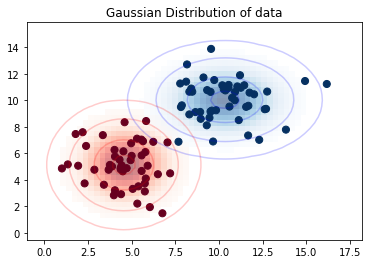

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax=plt.subplots()
ax.scatter(X[:,0],X[:,1],c=y,s=50,cmap='RdBu')
xlim=(min(X[:,0])-2,max(X[:,0])+2)
ylim=(min(X[:,1])-2,max(X[:,1])+2)

xg=np.linspace(xlim[0],xlim[1],60)
yg=np.linspace(ylim[0],ylim[1],40)
xx,yy=np.meshgrid(xg,yg)
Xgrid=np.vstack([xx.ravel(),yy.ravel()]).T

for label,color in enumerate(['red','blue']):
    mask=(y==label)
    mu,std=X[mask].mean(0),X[mask].std(0)
    P=np.exp(-0.5*(Xgrid-mu)**2/std**2).prod(1)
    Pm=np.ma.masked_array(P,P<0.03)
    ax.pcolorfast(xg,yg,Pm.reshape(xx.shape),alpha=0.5,cmap=color.title()+'s')
    ax.contour(xx,yy,P.reshape(xx.shape),levels=[0.01,0.1,0.5,0.9],colors=color,alpha=0.2)
ax.set(xlim=xlim,ylim=ylim)
plt.title('Gaussian Distribution of data')
plt.show()

In [34]:
gaussian_nb.predict(x_test),g_nb.predict(x_test)

(array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0],
       dtype=int64),
 array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0],
       dtype=int64))

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,gaussian_nb.predict(x_test)))
print(classification_report(y_test,g_nb.predict(x_test)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [36]:
gaussian_nb.predict_proba(x_test),g_nb.predict_proba(x_test)

(array([[9.99999746e-01, 2.54140753e-07],
        [7.63749214e-14, 1.00000000e+00],
        [4.23038642e-03, 9.95769614e-01],
        [9.99986614e-01, 1.33855473e-05],
        [7.05769182e-06, 9.99992942e-01],
        [9.99820566e-01, 1.79433743e-04],
        [9.72541524e-01, 2.74584756e-02],
        [9.99982043e-01, 1.79572091e-05],
        [2.85910189e-05, 9.99971409e-01],
        [1.01888837e-07, 9.99999898e-01],
        [7.39129058e-01, 2.60870942e-01],
        [9.99793438e-01, 2.06561658e-04],
        [9.99999915e-01, 8.46737165e-08],
        [2.03213294e-05, 9.99979679e-01],
        [8.76198350e-09, 9.99999991e-01],
        [6.51163513e-05, 9.99934884e-01],
        [9.27638525e-05, 9.99907236e-01],
        [7.58034673e-09, 9.99999992e-01],
        [1.81773339e-03, 9.98182267e-01],
        [9.99985544e-01, 1.44557945e-05]]),
 array([[9.99999746e-01, 2.54140753e-07],
        [7.63749214e-14, 1.00000000e+00],
        [4.23038642e-03, 9.95769614e-01],
        [9.99986614e-01, 1.33855

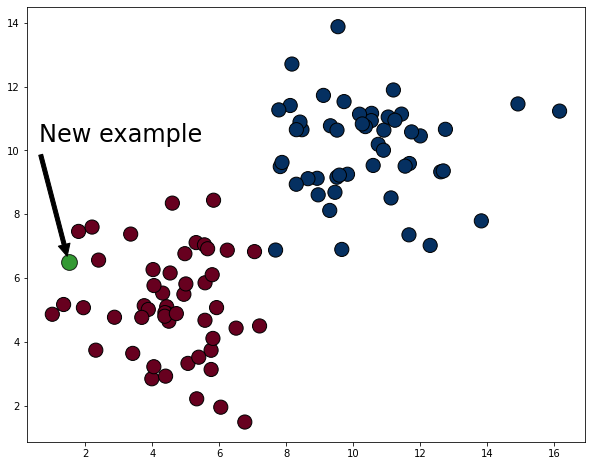

In [37]:
x_new=np.array([1.5,6.5])
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1],marker='o',c=y,s=200,edgecolor='k',cmap='RdBu')

plt.scatter(x_new[0],x_new[1],marker='o',c='green',s=250,edgecolor='k',alpha=0.8)
plt.annotate('New example',xy=x_new,xytext=(-30,120),textcoords='offset points',
            arrowprops=dict(facecolor='black',shrink=0.05),fontsize=24)
plt.show()

In [38]:
gaussian_nb.predict_proba(np.array([x_new])),g_nb.predict_proba(np.array([x_new]))

(array([[9.99996296e-01, 3.70449944e-06]]),
 array([[9.99996296e-01, 3.70449944e-06]]))

In [39]:
X,y=make_blobs(n_samples=100,
              n_features=2,centers=[[5,5],[10,10],[20,20]],
              cluster_std=1.5,
              random_state=3)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [40]:
gaussian_nb_multiclass=GaussianNB()
gaussian_nb_multiclass.fit(x_train,y_train)

Mean: [[ 4.94844927  4.67947138]
 [ 9.62097704 10.49990402]
 [19.63832097 19.94706375]]
Variance: [[1.99332345 2.36976247]
 [1.68415535 2.25596351]
 [1.79203315 1.24939267]]
Priors: [0.3375 0.35   0.3125]


In [41]:
print(classification_report(y_test,gaussian_nb_multiclass.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [42]:
gaussian_nb_multiclass.predict_proba(x_test)

array([[1.02996770e-47, 2.67740135e-24, 1.00000000e+00],
       [5.00111567e-05, 9.99949989e-01, 6.51529293e-32],
       [9.99999999e-01, 9.45325297e-10, 1.33290144e-78],
       [1.00000000e+00, 6.49743430e-12, 7.70260328e-90],
       [1.50617094e-52, 5.94123831e-27, 1.00000000e+00],
       [3.77917160e-47, 9.99218112e-23, 1.00000000e+00],
       [5.30598294e-33, 9.05195020e-13, 1.00000000e+00],
       [6.63950534e-07, 9.99999336e-01, 1.42699786e-26],
       [3.57244754e-61, 3.86494439e-34, 1.00000000e+00],
       [9.70872284e-06, 9.99990291e-01, 5.02104511e-31],
       [9.99982252e-01, 1.77477098e-05, 2.51366893e-63],
       [3.93493321e-39, 5.51495730e-18, 1.00000000e+00],
       [1.00000000e+00, 4.72574372e-11, 1.19906531e-79],
       [1.19575291e-47, 3.45203067e-24, 1.00000000e+00],
       [9.09245241e-01, 9.07547595e-02, 1.30885257e-46],
       [9.99999997e-01, 2.64110663e-09, 3.37901343e-80],
       [9.97572472e-01, 2.42752753e-03, 1.17514148e-55],
       [1.12896485e-05, 9.99988

#### Multinomial NB: Implementation

In [43]:
class MultinomialNBPractice:
    def fit(self,X,y,alpha=1):
        self.alpha=alpha
        n_samples,n_features=X.shape
        self._classes=np.unique(y)
        n_classes=len(self._classes)
        self.w=np.zeros((n_classes,n_features))
        self.w_priors=np.zeros(n_classes)
        for idx,c in enumerate(self._classes):
            X_c=X[y==c]
            total_count=np.sum(np.sum(X_c,axis=1))
            self.w[idx,:]=(np.sum(X_c,axis=0)+alpha)/(X_c.shape[0]+2*alpha)
            self.w_priors[idx]=(X_c.shape[0]+alpha)/(n_samples+n_classes*alpha)
    def log_likelihood_prior_prod(self,X):
        return X@(np.log(self.w).T)+np.log(self.w_priors)
    def predict(self,X):
        return np.argmax(self.log_likelihood_prior_prod(X),axis=1)
    def predict_proba(self,X):
        q=self.log_likelihood_prior_prod(X)
        return np.exp(q)/np.expand_dims(np.sum(np.exp(q),axis=1),axis=1)

In [44]:
class MultinomialNB(object):
    def fit(self,X,y,alpha=1):
        n_samples,n_features=X.shape
        self._classes=np.unique(y)
        n_classes=len(self._classes)
        
        self.w=np.zeros((n_classes,n_features),dtype=np.float64)
        self.w_prior=np.zeros(n_classes,dtype=np.float64)
        
        for idx,c in enumerate(self._classes):
            X_c=X[y==c]
            total_count=np.sum(np.sum(X_c,axis=1))
            self.w[idx,:]=(np.sum(X_c,axis=0)+alpha)/(total_count+alpha*n_features)
            
            self.w_prior[idx]=(X_c.shape[0]+alpha)/float(n_samples+alpha*n_classes)
    def log_likelihood_prior_prod(self,X):
        return X@(np.log(self.w).T)+np.log(self.w_prior)
    def predict(self,X):
        return np.argmax(self.log_likelihood_prior_prod(X),axis=1)
    def predict_proba(self,X):
        q=self.log_likelihood_prior_prod(X)
        return np.exp(q)/np.expand_dims(np.sum(np.exp(q),axis=1),axis=1)
    

In [45]:
rng=np.random.RandomState(1)
X=rng.randint(5,size=(1000,5))
y=rng.randint(2,size=(1000,))
x_train,x_test,y_train,y_test=train_test_split(X,y)

In [46]:
print("Shape of feature matrix:",x_train.shape)
print("Shape of label vector:",y_train.shape)

Shape of feature matrix: (750, 5)
Shape of label vector: (750,)


In [47]:
multinomial_nb=MultinomialNB()
multinomial_nb.fit(x_train,y_train)
print("prior",multinomial_nb.w_prior)
print("Parameters of multinomial distribution",multinomial_nb.w)

prior [0.4893617 0.5106383]
Parameters of multinomial distribution [[0.21928166 0.19011612 0.19092628 0.19659735 0.20307858]
 [0.20506912 0.20558116 0.19918075 0.19918075 0.19098822]]


In [48]:
print(classification_report(y_test,multinomial_nb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50       118
           1       0.56      0.56      0.56       132

    accuracy                           0.53       250
   macro avg       0.53      0.53      0.53       250
weighted avg       0.53      0.53      0.53       250



In [49]:
multinomial_nb.predict_proba(x_test[:5])

array([[0.49341181, 0.50658819],
       [0.55653281, 0.44346719],
       [0.47061724, 0.52938276],
       [0.52119729, 0.47880271],
       [0.61252778, 0.38747222]])

In [50]:
# Multiclass set up

In [51]:
rng=np.random.RandomState(1)
X=rng.randint(5,size=(1000,5))
y=rng.randint(3,size=(1000,))
x_train,x_test,y_train,y_test=train_test_split(X,y)

In [52]:
multinomial_nb=MultinomialNB()
multinomial_nb.fit(x_train,y_train)
print("Prior:",multinomial_nb.w_prior)
print("Parameters of multinomial distribution",multinomial_nb.w)

Prior: [0.34926959 0.33598938 0.31474104]
Parameters of multinomial distribution [[0.20368324 0.19705341 0.19042357 0.2        0.20883978]
 [0.2120607  0.18330671 0.19728435 0.20047923 0.20686901]
 [0.21504014 0.1947613  0.19771863 0.20321082 0.18926912]]


In [53]:
print(classification_report(y_test,multinomial_nb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.34      0.48      0.40        85
           1       0.39      0.33      0.36        90
           2       0.21      0.15      0.17        75

    accuracy                           0.33       250
   macro avg       0.31      0.32      0.31       250
weighted avg       0.32      0.33      0.32       250



In [54]:
multinomial_nb.predict_proba(x_test[:5])

array([[0.35373009, 0.32556894, 0.32070097],
       [0.34866317, 0.30132491, 0.35001192],
       [0.34255287, 0.37304761, 0.28439952],
       [0.3564733 , 0.34761506, 0.29591164],
       [0.35452631, 0.37088086, 0.27459283]])

<h3 style="font-family:Courier New">Week 7</h3>

In [55]:
# SOFTMAX REGRESSION IMPLEMENTATION

In [81]:
def convert_to_one_hot_encoding(y,k):
    y_one_hot=np.zeros((len(y),k))
    unique=np.unique(y)
    unq_replaceable=np.arange(k)
#     y[y==unique]=unq_replaceable
    for i in range(unique.shape[0]):
        y[y==unique[i]]=unq_replaceable[i]
    y_one_hot[np.arange(len(y)),y]=1
    return y_one_hot
def linear_combination(X,w,b):
    return X@w+b

In [82]:
convert_to_one_hot_encoding(np.array([8,7,1,0]),4)

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [61]:
def softmax(z):
    # SUBTRACTING THE MAX OF Z FOR NUMERICAL STABILITY
    exp=np.exp(z-np.max(z))
    print(z)
    print(len(z))
    for i in range(len(z)):
        exp[i]/=np.sum(exp[i])
        print(exp)
    return exp

In [62]:
(np.sum(softmax(np.array([[2.1,4.8,3.5]]))))

[[2.1 4.8 3.5]]
1
[[0.0501632  0.74641498 0.20342181]]


1.0000000000000002

In [53]:
# LOSS FUNCTION : CATEGORICAL CROSS ENTROPY LOSS
# J(W,b)=-Sigma(yklog(y^k))


In [68]:
#TRAINING 
def fit(X,y,lr,c,epochs):
    # c is the number of classes
    #no.of train examples, no.of featuress
    n,m=X.shape
    w=np.random.random((m,c))
    b=np.random.random(c)
    losses=[]
    for epoch in range(epochs):
        z=X@w+b
        y_hat=softmax(z)
        y_hot=convert_to_one_hot_encoding(y,c)
        w_grad=(1/n)*np.dot(X.T,(y_hat-y_hot))
        b_grad=(1/n)*np.sum(y_hat-y_hot)
        
        w=w-lr*w_grad
        b=b-lr*b_grad
        
        loss=-np.mean(np.log(y_hat[np.arange(len(y)),y]))
        losses.append(loss)
        
        if epoch%10==0:
            print("Epoch {epoch}==>Loss={loss}".format(epoch=epoch,loss=loss))
    return w,b,losses
    
def predict(X,w,b):
    z=X@w+b
    y_hat=softmax(z)
    return np.argmax(y_hat,axis=1)
def accuracy(y,y_hat):
    return np.sum(y==y_hat)/len(y)

In [59]:
# TRAINING DIGIT RECOGNIZER ON MNIST DATASET
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
(train_X,train_Y),(test_X,test_y)=mnist.load_data()

11501568/11490434 [==============================] - 4s 0us/step


In [60]:
X_train=train_X.reshape(train_X.shape[0],28*28)
X_test=test_X.reshape(test_X.shape[0],28*28)

X_train=X_train/255
X_test=X_test/255



In [69]:
w,b,l=fit(X_train,train_Y,lr=0.9,c=10,epochs=100)

Epoch 0==>Loss=5.169558681004112
Epoch 10==>Loss=1.010913978572058
Epoch 20==>Loss=0.6614889764808831
Epoch 30==>Loss=0.5698446265709646
Epoch 40==>Loss=0.5205474177123396
Epoch 50==>Loss=0.48825128842561727
Epoch 60==>Loss=0.46494919511204785
Epoch 70==>Loss=0.4471100617524519
Epoch 80==>Loss=0.43288100821832437
Epoch 90==>Loss=0.42118556001179597


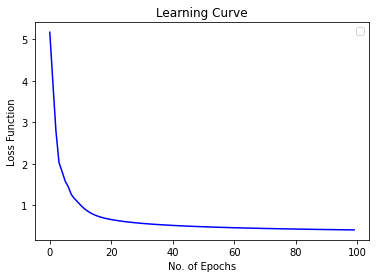

In [70]:
# LEARNING CURVE
plt.figure()
plt.title('Learning Curve')
plt.legend(['Training Loss'])
plt.xlabel('No. of Epochs')
plt.ylabel('Loss Function')
plt.plot(np.arange(len(l)),l,'b-')
plt.show()

In [72]:
train_preds=predict(X_train,w,b)
print(accuracy(train_Y,train_preds))

0.8784166666666666


In [74]:
# PERFORMANCE OF CLASSIFIER
test_preds=predict(X_test,w,b)
print(accuracy(test_y,test_preds))

0.8864


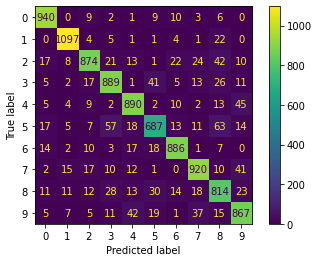

In [76]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(test_y,test_preds)
cm_disp=ConfusionMatrixDisplay(cm)
cm_disp.plot()

In [77]:
from sklearn.metrics import classification_report
print(classification_report(test_y,test_preds))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       980
           1       0.95      0.97      0.96      1135
           2       0.91      0.85      0.88      1032
           3       0.86      0.88      0.87      1010
           4       0.88      0.91      0.89       982
           5       0.85      0.77      0.81       892
           6       0.92      0.92      0.92       958
           7       0.89      0.89      0.89      1028
           8       0.80      0.84      0.82       974
           9       0.86      0.86      0.86      1009

    accuracy                           0.89     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.89      0.89     10000



In [78]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print(f1_score(test_y,test_preds,average='micro'))
print(precision_score(test_y,test_preds,average='micro'))
print(recall_score(test_y,test_preds,average='micro'))

0.8864
0.8864
0.8864


In [79]:
print(f1_score(test_y,test_preds,average='macro'))
print(precision_score(test_y,test_preds,average='macro'))
print(recall_score(test_y,test_preds,average='macro'))

0.8843280440552755
0.8850351604969559
0.8844074371092155


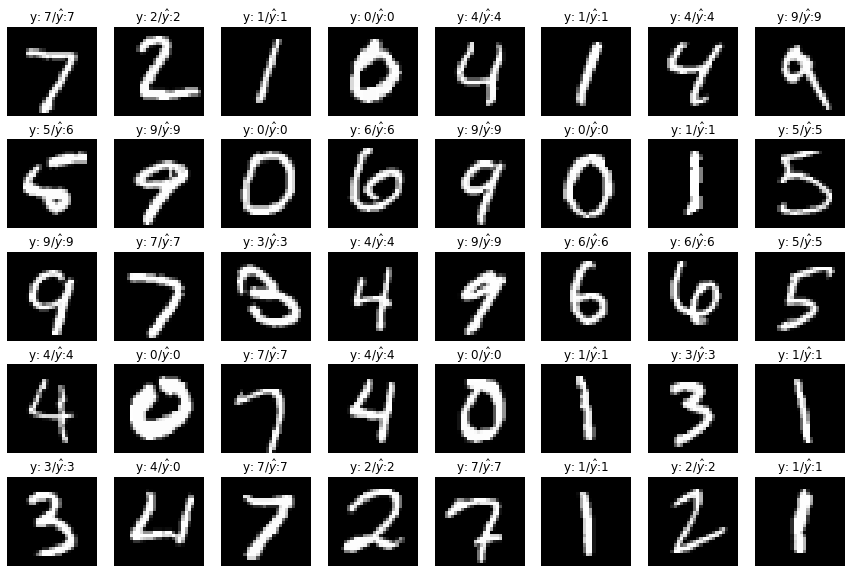

In [80]:
fig=plt.figure(figsize=(15,10))
for i in range(40):
    ax=fig.add_subplot(5,8,i+1)
    ax.imshow(test_X[i],cmap=plt.get_cmap('gray'))
    ax.set_title(f'y: ${test_y[i]}$/'+'$\hat{y}$:'+f'{test_preds[i]}')
    plt.axis('off')

In [81]:
# KNN 

In [83]:
from IPython.display import display, Math, Latex
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from scipy import stats
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split

In [20]:
'''
X1,X2 are numpy arrays
'''
def EuclideanDistance(x1,x2):
    return np.sum((x1-x2)**2,axis=1)
def ManhattanDistance(x1,x2):
    return np.sum(np.abs(x1-x2),axis=1)


In [3]:
class KNN:
    def __init__(self,k,distance_metric=EuclideanDistance,task_type='Classification'):
        self._k=k
        self._distance_metric=distance_metric
        self._task_type=task_type
    def fit(self,X,y):
        self._X=X
        self._y=y
    def predict(self,newExample):
        distance_vector=self._distance_metric(self._X,newExample)
        k_neighbor_indices=np.argpartition(distance_vector,self._k)[:self._k]
        k_neighbors=self._y[k_neighbor_indices]
        if self._task_type=='Classification':
            label=stats.mode(k_neighbors)[0]
        else:
            label=k_neighbors.mean()
        return label,k_neighbor_indices
    def eval(self,X_test,y_test):
        if self._task_type=='Classification':
            y_pred=np.zeros(y_test.shape)
            for i in range(y_test.shape[0]):
                y_pred[i],_=self.predict(X_test[i,:])
            error=np.mean(y_test==y_pred,axis=0)
        else:
            y_pred=np.zeros(y_test.shape)
            for i in range(y_test.shape[0]):
                y_pred[i],_=self.predict(X_test[i,:])
            error_vector=y_pred-y_test
            error=np.sqrt((error_vector.T@error_vector)/error_vector.ravel().shape[0])
        return error

In [11]:
X=np.array([[-8,20],[-12,11],[0,26],[-5,5],[-1,22],[-7,1]])
y=np.array([0.4,0.6,0.1,1.0,0.8,-0.3])
k=KNN(1,task_type='Regression')
k.fit(X,y)
k.predict(np.array([-10,0]))

(-0.3, array([5], dtype=int64))

In [19]:
ManhattanDistance(np.array([[3,-45,96,56,-3.9]]),np.array([[33,-102,7,0.7,-10]]))

array([237.4])

In [86]:
'''
CLASSIFICATION

Simple decision boundary
'''

'\nCLASSIFICATION\n\nSimple decision boundary\n'

In [87]:
X,y=make_blobs(n_samples=100,n_features=2,centers=[[0,0,],[5,5]],cluster_std=1,random_state=12)

In [88]:
X.shape,y.shape

((100, 2), (100,))

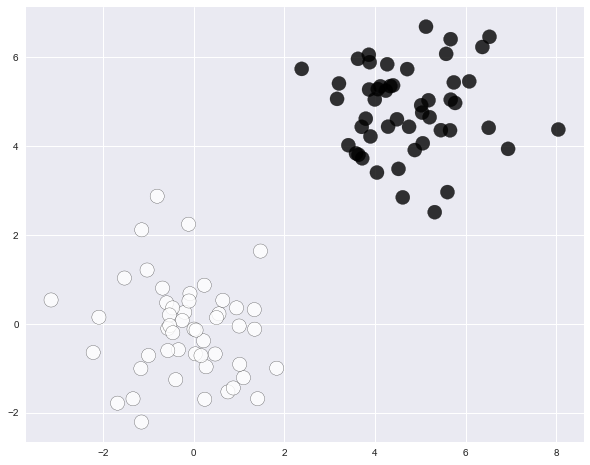

In [89]:
plt.figure(figsize=(10,8))
plt.grid(True)
plt.scatter(X[:,0],X[:,1],marker='o',c=y,s=200,edgecolor='k',alpha=0.8)
plt.show()

In [91]:
newEx=np.array([2.2,2.2])
model=KNN(3,distance_metric=EuclideanDistance)
model.fit(X,y)
prediction,nearest_neigbours_indices=model.predict(newEx.reshape(1,2))

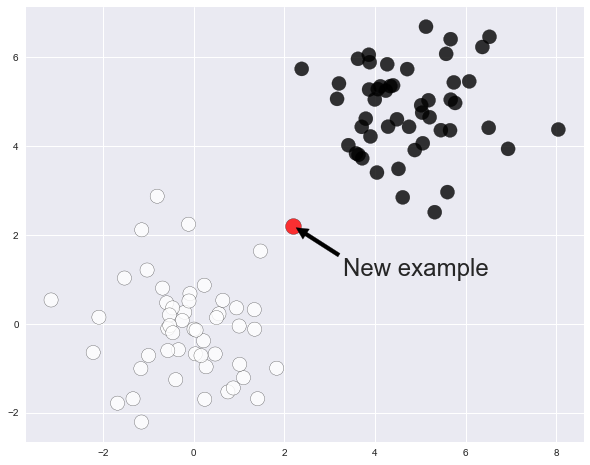

In [93]:
plt.figure(figsize=(10,8))
plt.grid(True)
plt.scatter(X[:,0],X[:,1],marker='o',c=y,s=200,edgecolor='k',alpha=0.8)
plt.scatter(newEx[0],newEx[1],marker='o',c='red',s=250,edgecolor='k',alpha=0.8)
plt.annotate('New example',xy=newEx,xytext=(50,-50),textcoords='offset points',arrowprops=dict(facecolor='black',shrink=0.05),fontsize=24)
plt.show()

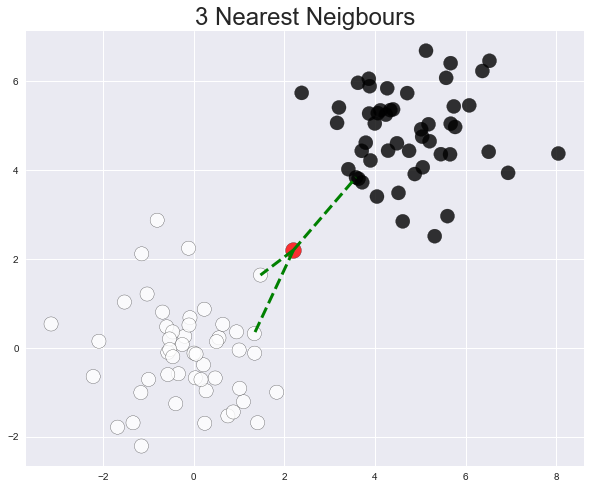

In [95]:
plt.figure(figsize=(10,8))
plt.grid(True)
plt.scatter(X[:,0],X[:,1],marker='o',c=y,s=200,edgecolor='k',alpha=0.8)
plt.scatter(newEx[0],newEx[1],marker='o',c='red',s=250,edgecolor='k',alpha=0.8)
for xi in X[nearest_neigbours_indices]:
    plt.plot([newEx[0],xi[0]],[newEx[1],xi[1]],'g--',linewidth=3)
plt.title('3 Nearest Neigbours',fontsize=24)
plt.show()

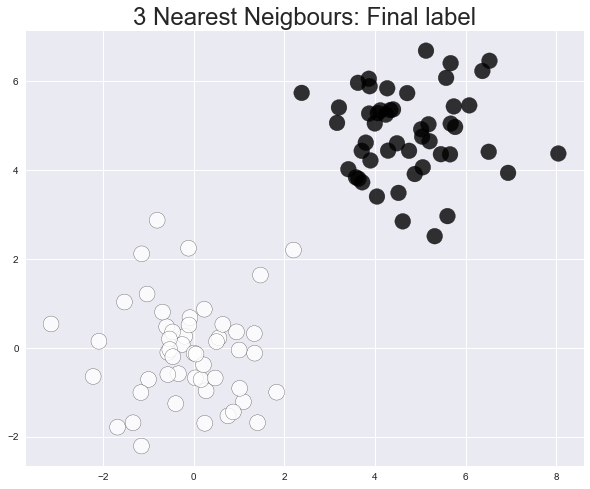

In [96]:
plt.figure(figsize=(10,8))
plt.grid(1)
tx=np.concatenate((X,newEx.reshape(1,2)),axis=0)
ty=np.concatenate((y,prediction),axis=0)
plt.scatter(tx[:,0],tx[:,1],marker='o',c=ty,s=250,edgecolor='k',alpha=0.8)
plt.title('3 Nearest Neigbours: Final label',fontsize=24)
plt.show()

In [97]:
def draw_decision_boundary(model,axis_chart,num_points=201,opacity=0.05):
    tx=np.linspace(np.min(model._X[:,0],axis=0)-2,
                  np.max(model._X[:,0],axis=0)+2,num_points)
    ty=np.linspace(np.min(model._X[:,1],axis=0)-2,
                  np.max(model._X[:,1],axis=0)+2,num_points)
    xx,yy=np.meshgrid(tx,ty)
    grid_prediction=np.zeros(xx.shape)
    for i in range(num_points):
        for j in range(num_points):
            grid_prediction[i][j],_=model.predict([xx[i][j],yy[i][j]])
    axis_chart.scatter(xx.ravel(),yy.ravel(),c=grid_prediction.ravel(),alpha=opacity)
    

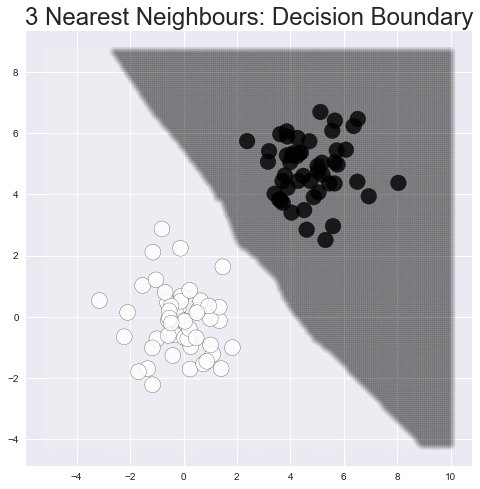

In [98]:
plt.figure(figsize=(8,8))
current_axis=plt.gca()
draw_decision_boundary(model,current_axis)
plt.scatter(X[:,0],X[:,1],marker='o',c=y,
           s=250,edgecolor='k',alpha=0.8)
plt.title('3 Nearest Neighbours: Decision Boundary',fontsize=24)
plt.show()

In [101]:
'''
Complex Decision Boundary
'''
def maketwospirals(num_points=1000,rotations=2,noise=0.5):
    n=np.sqrt(np.random.rand(num_points,1))*rotations*(2*np.pi)
    rx=-np.cos(n)*n+np.random.rand(num_points,1)*noise
    ry=np.sin(n)*n+np.random.rand(num_points,1)*noise
    
    return (np.concatenate((np.hstack((rx,ry)),
                           np.hstack((-rx,-ry))),axis=0),
np.concatenate((np.zeros(num_points),
                                                                       np.ones(num_points)),axis=0))
X_spiral,y_spiral=maketwospirals()

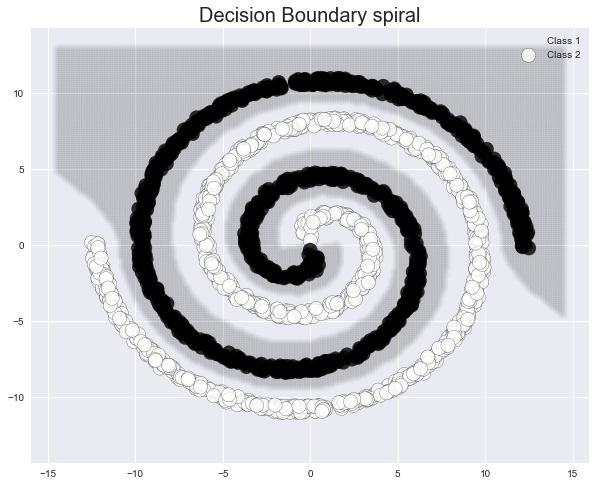

In [103]:
plt.figure(figsize=(10,8))
model=KNN(3)
model.fit(X_spiral,y_spiral)
draw_decision_boundary(model,plt.gca(),opacity=0.02)
plt.scatter(X_spiral[:,0],X_spiral[:,1],marker='o',c=y_spiral,s=200,edgecolor='k',alpha=0.8)
plt.title('Decision Boundary spiral',fontsize=20)
plt.legend(['Class 1','Class 2'])
plt.show()



In [104]:
'''
Regression using kNN
'''


'\nRegression using kNN\n'

In [105]:
np.random.seed(42)
w1=3
w0=4
n=100
X=2*np.random.rand(n,)
y=w0+w1*X+np.random.randn(n,)

In [106]:
X=X.reshape(-1,1)
y=y.reshape(-1,1)

In [107]:
X.shape,y.shape

((100, 1), (100, 1))

In [108]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [109]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((80, 1), (80, 1), (20, 1), (20, 1))

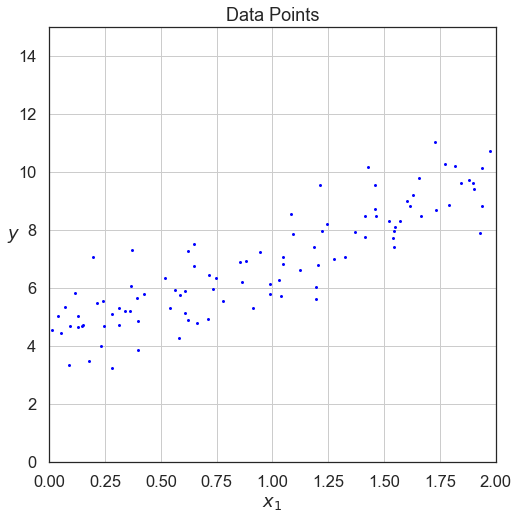

In [110]:
sns.set_style('white')
f=plt.figure(figsize=(8,8))
sns.set_context('notebook',font_scale=1.5,rc={'lines.linewidth':2.5})

plt.plot(X,y,'b.')
plt.title('Data Points')
plt.grid(1)
plt.xlabel('$x_1$',fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([0,2,0,15])
plt.show()

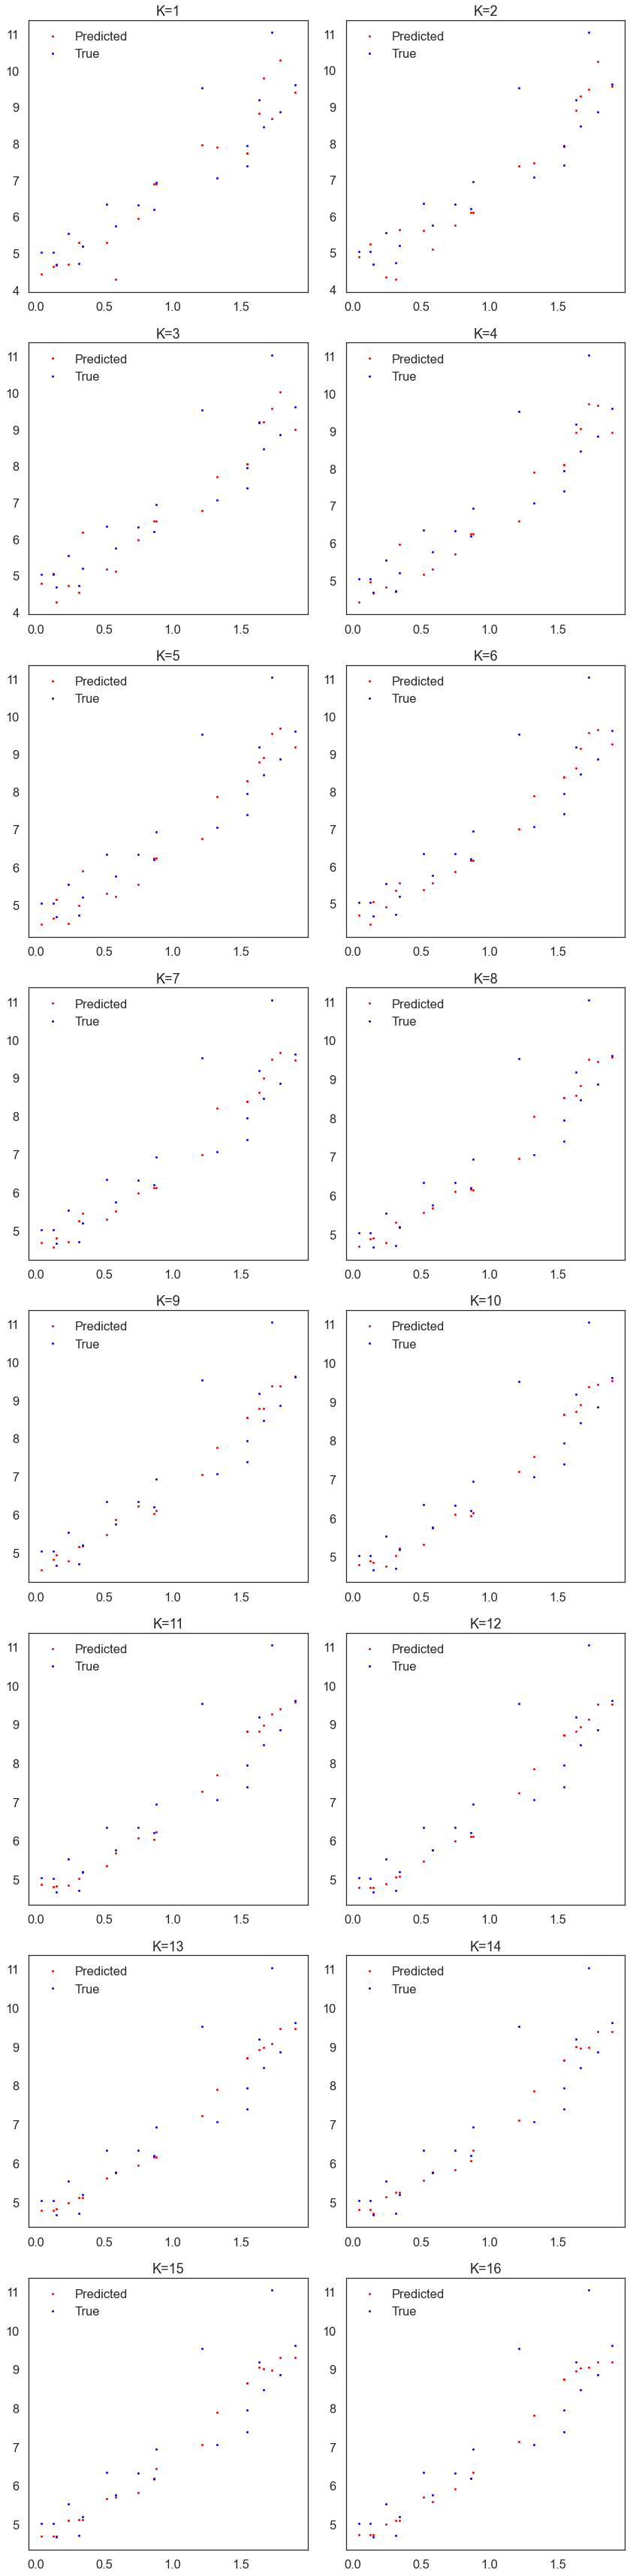

In [112]:
fig,ax=plt.subplots(8,2,figsize=(12,48))
ax=ax.ravel()
err_lst=[]
for i in range(16):
    model=KNN(i+1,task_type='Regression')
    model.fit(x_train,y_train)
    y_test_pred=np.zeros_like(y_test)
    
    for j in range(x_test.shape[0]):
        y_test_pred[j],_=model.predict(x_test[j,:])
    err_lst.append(np.sum(np.power(y_test-y_test_pred,2)))
    ax[i].plot(x_test,y_test_pred,'r.')
    ax[i].plot(x_test,y_test,'b.')
    ax[i].legend(['Predicted','True'])
    ax[i].set_title(f"K={i+1}")
fig.tight_layout()
plt.show()

Text(0, 0.5, 'Error')

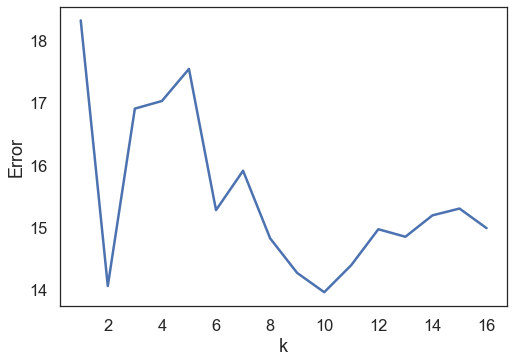

In [113]:
plt.plot(np.arange(len(err_lst))+1,err_lst)
plt.xlabel('k')
plt.ylabel('Error')

In [114]:
# K=2 is better for having less computation power and time
# However K=10 is the best option among the values

WEEK 8

In [53]:
# HARD MARGIN SVM
def fit(self, X, y):
    """
    Use GD to find the weights
    """
    n_sample, n_features = X.shape
    y_ = np.where(y <= 0 ,-1,1)
    self.w = np.zeros(n_features)
    self.b = 0 
    for _ in range(self.n_iters):
          for idx , x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i,self.w) - self.b) >=1 # y* (w.x -b ) >=1 
                if condition:
                    # w = w- (lr*2*lambda*w)
                    self.w -= self.lr * ( 2* self.lambda_param * self.w)
                else:
                    self.w -= self.lr * ( 2* self.lambda_param * self.w - np.dot(x_i,y_[idx]))
                    self.b -= self.lr * y_[idx]

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification,make_blobs
sns.set_theme(style="whitegrid")

In [85]:
class softSVM:
    def __init__(self,C):
        self._support_vectors=None
        self.C=C
        self.w=None
        self.b=None
        self.X=None
        self.y=None
        #Number of data points
        self.n=0
        # Dimensions
        self.d=0
    def __decision_function(self,X):
        return X.dot(self.w)+self.b
    def __cost(self,margin):
        return (1/2)*self.w.dot(self.w)+self.C*np.sum(np.maximum(0,1-margin))
    def __margin(self,X,y):
        return y*self.__decision_function(X)
    def fit(self,X,y,lr=1e-3,epochs=500):
        self.n,self.d=X.shape
        self.w=np.random.randn(self.d)
        self.b=0
        
        self.X=X
        self.y=y
        
        loss_arr=[]
        for _ in range(epochs):
            margin=self.__margin(X,y)
            loss=self.__cost(margin)
            loss_arr.append(loss)
            
            misclassified_pts_idx=np.where(margin<1)[0] # misclassified criteria - y.T@(Xw-b) < 1 
            d_w=self.w-self.C*y[misclassified_pts_idx].dot(X[misclassified_pts_idx])
            
            self.w=self.w-lr*d_w
            d_b=-self.C*np.sum(y[misclassified_pts_idx])
            self.b=self.b-lr*d_b
        self._support_vectors=np.where(self.__margin(X,y)<=1)[0]
    def predict(self,X,):
        return np.sign(self.__decision_function(X))
    def score(self,X,y):
        p=self.predict(X)
        return np.mean(y==p)
    def plot_decision_boundary(self):
        plt.scatter(self.X[:,0],self.X[:,1],c=self.y,marker='o',s=100,cmap='autumn')
        ax=plt.gca()
        xlim=ax.get_xlim()
        ylim=ax.get_ylim()
        
        xx=np.linspace(xlim[0],xlim[1],30)
        yy=np.linspace(ylim[0],ylim[1],30)
        YY,XX=np.meshgrid(yy,xx)
        xy=np.vstack([XX.ravel(),YY.ravel()]).T
        Z=self.__decision_function(xy).reshape(XX.shape)
        
        ax.contour(XX,YY,Z,colors=['g','k','g'],levels=[-1,0,1],linestyles=['--','-','--'],linewidths=[2.0,2.0,2.0])
        
        ax.scatter(self.X[:,0][self._support_vectors],
                  self.X[:,1][self._support_vectors],s=250,linewidth=1,facecolors='none',edgecolors='k')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.show()

In [10]:
X,Y=make_blobs(n_samples=60,n_features=2,centers=[[0,0],[6,6]],cluster_std=1,
              random_state=12)
Y=np.where(Y==0,-1,1)

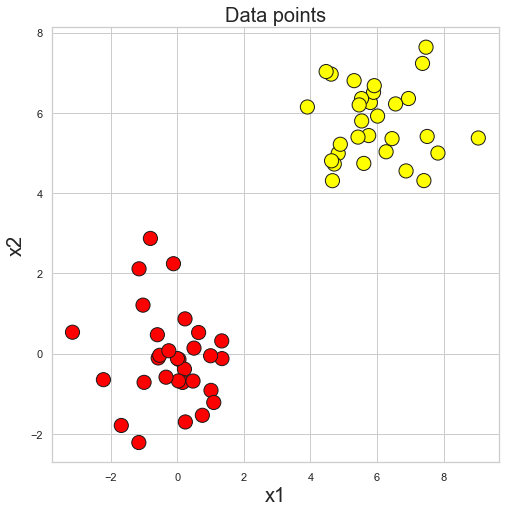

In [11]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0],X[:,1],marker='o',c=Y,s=200,edgecolor='k',cmap='autumn')
plt.xlabel('x1',fontsize=20)
plt.ylabel('x2',fontsize=20)
plt.title('Data points',fontsize=20)
plt.show()

[0.32074831 0.24167768]


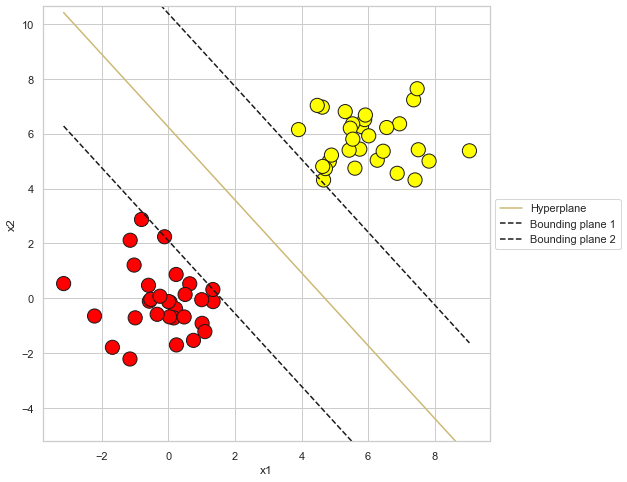

In [13]:
svm=softSVM(C=1)
svm.fit(X,Y)

print(svm.w)
def get_hyperplane_value(x,w,b,offset):
    return -1*(w[0]*x+b+offset)/w[1]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
plt.scatter(X[:,0],X[:,1],marker='o',c=Y,s=200,edgecolor='k',cmap='autumn')
x0_1=np.amin(X[:,0])
x0_2=np.amax(X[:,0])

x1_1=get_hyperplane_value(x0_1,svm.w,svm.b,0)
x1_2=get_hyperplane_value(x0_2,svm.w,svm.b,0)

x1_1_m=get_hyperplane_value(x0_1,svm.w,svm.b,-1)
x1_2_m=get_hyperplane_value(x0_2,svm.w,svm.b,-1)

x1_1_p=get_hyperplane_value(x0_1,svm.w,svm.b,1)
x1_2_p=get_hyperplane_value(x0_2,svm.w,svm.b,1)

ax.plot([x0_1,x0_2],[x1_1,x1_2],'y')
ax.plot([x0_1,x0_2],[x1_1_m,x1_2_m],'k--')
ax.plot([x0_1,x0_2],[x1_1_p,x1_2_p],'k--')

x1_min=np.amin(X[:,1])
x1_max=np.amax(X[:,1])
ax.set_ylim([x1_min-3,x1_max+3])
ax.legend(['Hyperplane','Bounding plane 1','Bounding plane 2'],loc='center left',bbox_to_anchor=(1,0.5))
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

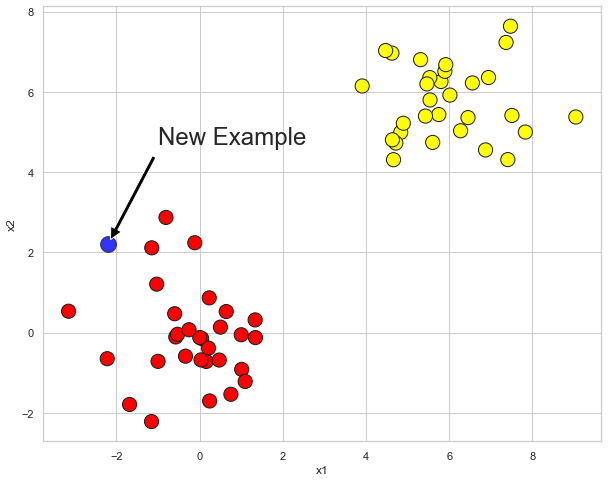

In [15]:
newEx=np.array([-2.2,2.2])
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1],marker='o',c=Y,s=200,edgecolor='k',cmap='autumn')
plt.scatter(newEx[0],newEx[1],marker='o',c='blue',s=250,edgecolor='k',alpha=0.8)
plt.annotate('New Example',xy=newEx,xytext=(50,100),textcoords='offset points',arrowprops=
            dict(facecolor='black',shrink=0.05),fontsize=24)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [16]:
svm.predict(newEx)

-1.0

In [75]:
X=np.array([[2,1],[2,-1],[0,2],[4,0],[5,1],[6,2],[-1,0],[5,-1]])
y=np.array([-1,-1,-1,1,1,1,-1,1])

In [127]:
X=np.array([[2,2],[2,-2],[-2,2],[-2,-2],[1,1],[1,-1],[-1,1],[-1,-1]])
y=np.array([1,1,1,1,-1,-1,-1,-1])

In [128]:
X.shape,y.shape

((8, 2), (8,))

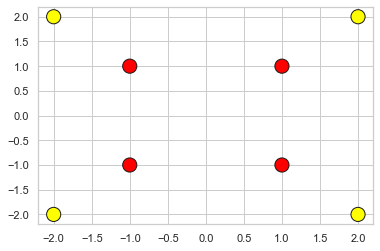

In [129]:
plt.scatter(X[:,0],X[:,1],marker='o',c=y,s=200,edgecolor='k',cmap='autumn')
plt.show()

In [111]:
svm=softSVM(C=0)
svm.fit(X,y)
svm.w

array([1.04268652, 0.39276184])

In [112]:
svm.b

0.0

In [17]:
# LINEARLY SEPARABLE WITH NOISE

In [138]:
def func(X):
    x,y=X
    if np.sqrt(x**2+y**2)>2:
        return (4-y+np.abs(x-y),4-x+np.abs(x-y))
    else:
        return (x,y)
final=list(map(func,X))
print(final)

[(2, 2), (10, 6), (6, 10), (6, 6), (1, 1), (1, -1), (-1, 1), (-1, -1)]


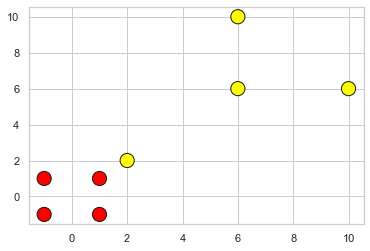

In [139]:
final=np.array(final)
plt.scatter(final[:,0],final[:,1],marker='o',c=y,s=200,edgecolor='k',cmap='autumn')
plt.show()

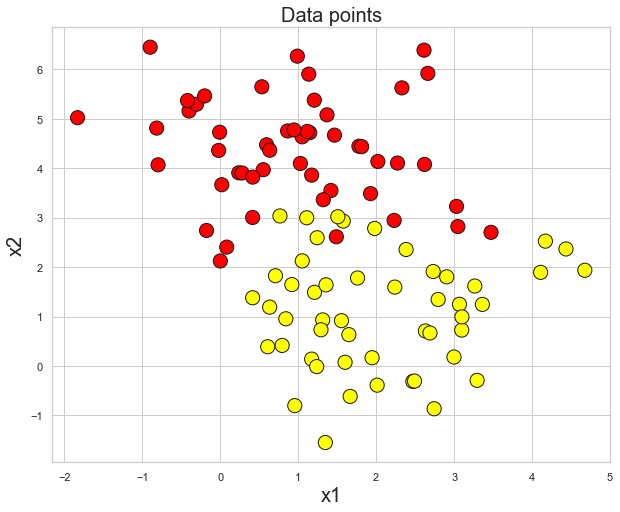

In [19]:
X,y=make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=1.1)
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1],marker='o',c=y,s=200,edgecolor='k',cmap='autumn')
plt.xlabel('x1',fontsize=20)
plt.ylabel('x2',fontsize=20)
plt.title('Data points',fontsize=20)
plt.show()

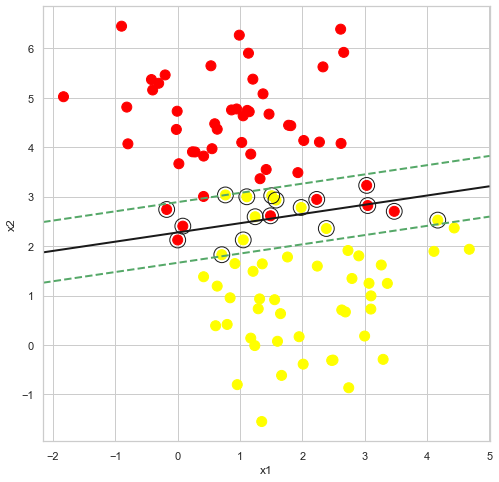

In [24]:
y[y==0]=-1
svm=softSVM(C=10)
svm.fit(X,y)
fig=plt.figure(figsize=(8,8))
svm.plot_decision_boundary()

In [25]:
# THE VALUE OF C changes the boundaries much apart and that helps in getting a good 
# Margin

In [26]:
# for C=100 the boundary is more hard and for C=1 the boundary is so soft

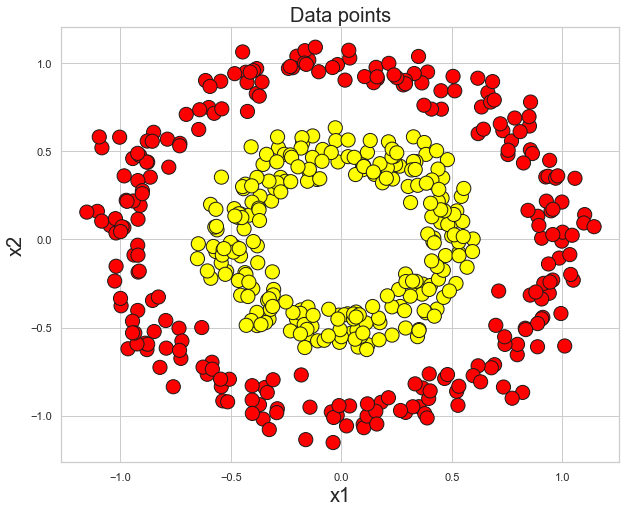

In [27]:
from sklearn.datasets import make_circles
X,y=make_circles(500,factor=0.5,noise=.08)
y[y==0]=-1
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1],marker='o',c=y,s=200,edgecolor='k',cmap='autumn')
plt.xlabel('x1',fontsize=20)
plt.ylabel('x2',fontsize=20)
plt.title('Data points',fontsize=20)
plt.show()

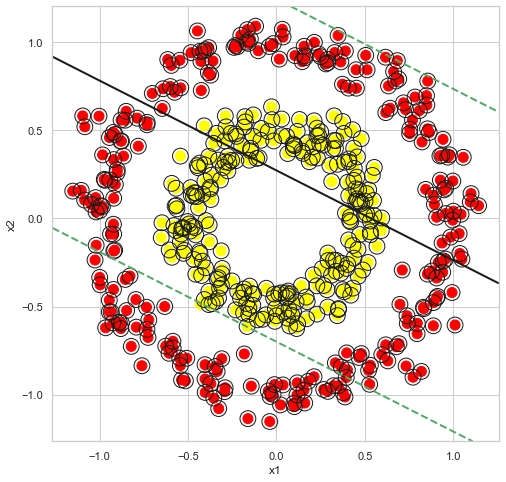

In [28]:
svm=softSVM(C=10)
svm.fit(X,y)
fig=plt.figure(figsize=(8,8))
svm.plot_decision_boundary()

In [29]:
# SOFT SVM ISN'T GOING TO HELP IN THIS CASE , NOW WE NEED TO USE KERNEL SVM

In [37]:
class SVMDualProblem:
    def __init__(self,C=1.0,kernel='rbf',sigma=0.1,degree=2):
        self.C=C
        if kernel=='poly':
            self.kernel=self._polynomial_kernel
            self.c=1
            self.degree=degree
        else:
            self.kernel=self._rbf_kernel
            self.sigma=sigma
        self.X=None
        self.y=None
        self.alpha=None
        self.b=0
        self.ones=None
    def _rbf_kernel(self,X1,X2):
        return np.exp(-(1/self.sigma**2)*np.linalg.norm(X1[:,np.newaxis]-X2[np.newaxis,:],axis=2)**2)
    def _polynomial_kernel(self,X1,X2):
        return (self.c+X1.dot(X2.T))**self.degree
    def fit(self,X,y,lr=1e-3,epochs=100):
        self.X=X
        self.y=y
        self.alpha=np.random.random(X.shape[0])
        self.b=0
        self.ones=np.ones(X.shape[0])
        
        y_iy_jk_ij=np.outer(y,y)*self.kernel(X,X)
        losses=[]
        for _ in range(epochs):
            gradient=self.ones=y_iy_jk_ij.dot(self.alpha)
            self.alpha=self.alpha+lr*gradient
            self.alpha[self.alpha>self.C]=self.C
            self.alpha[self.alpha<0]=0
            
            loss=np.sum(self.alpha)-0.5*np.sum(np.outer(self.alpha,self.alpha)*y_iy_jk_ij)
            losses.append(loss)
        index=np.where((self.alpha)>0&(self.alpha<self.C))[0]
        b_i=y[index]-(self.alpha*y).dot(self.kernel(X,X[index]))
        
        #Alternative code
        # b_i=y[index]-np.sum((self.alpha*y).reshape(-1,1)*self.kernel(X,X[index]),axis=0)
        self.b=np.mean(b_i)
        
        plt.plot(losses)
        plt.title('Loss per Epochs')
        plt.show()
    def _decision_function(self,X):
        return (self.alpha*self.y).dot(self.kernel(self.X,X))+self.b
    def predict(self,X):
        return np.sign(self._decision_function(X))
    def score(self,X,y):
        y_hat=self.predict(X)
        return np.mean(y==y_hat)
    def plot_decision_boundary(self):
        plt.scatter(self.X[:,0],self.X[:,1],c=self.y,s=50,cmap=plt.cm.Paired,alpha=0.5)
        ax=plt.gca()
        xlim=ax.get_xlim()
        ylim=ax.get_ylim()
        
        xx=np.linspace(xlim[0],xlim[1],30)
        yy=np.linspace(ylim[0],ylim[1],30)
        YY,XX=np.meshgrid(yy,xx)
        xy=np.vstack([XX.ravel(),YY.ravel()]).T
        Z=self._decision_function(xy).reshape(XX.shape)
        
        ax.contour(XX,YY,Z,colors=['b','g','r'],levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'],linewidths=[2.0,2.0,2.0])
        
        ax.scatter(self.X[:,0][self.alpha>0.],
                  self.X[:,1][self.alpha>0.],s=50,linewidth=1,facecolors='none',edgecolors='k')
#         plt.xlabel('x1')
#         plt.ylabel('x2')
        plt.show()

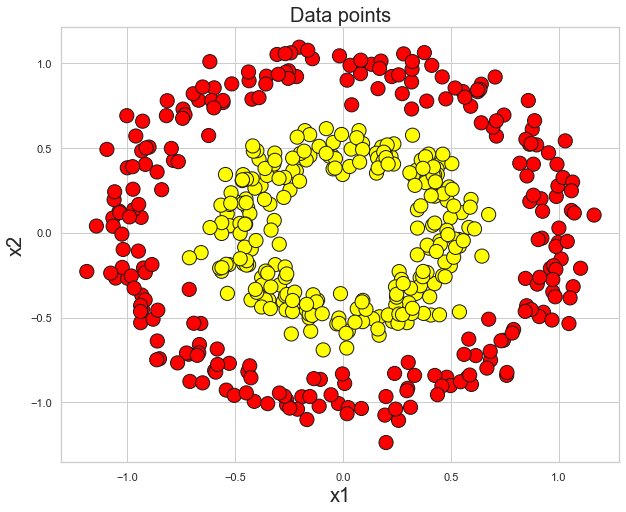

In [31]:
from sklearn.datasets import make_circles
X,y=make_circles(500,factor=0.5,noise=.08)
y[y==0]=-1
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1],marker='o',c=y,s=200,edgecolor='k',cmap='autumn')
plt.xlabel('x1',fontsize=20)
plt.ylabel('x2',fontsize=20)
plt.title('Data points',fontsize=20)
plt.show()

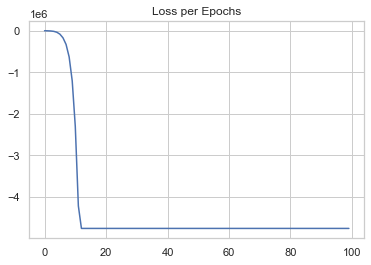

train score: 0.754


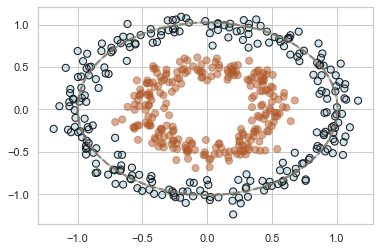

In [41]:
svm=SVMDualProblem(C=10,kernel='poly',degree=2)
svm.fit(X,y,lr=1e-3)
print('train score:',svm.score(X,y))
svm.plot_decision_boundary()

In [2]:
# WEEK 9

In [2]:
import numpy as np
import pandas as pd

In [3]:
eps=np.finfo(float).eps
eps

2.220446049250313e-16

#### smallest representable number for avoiding log(0) sort of cases

In [27]:
df_train=pd.read_csv(r'C:\Users\kabali\Downloads\play_tennis_train.csv')
df_test=pd.read_csv(r'C:\Users\kabali\Downloads\play_tennis_test.csv')

In [28]:
df=df_train

In [29]:
df=df.append(df_test)

C:\Users\kabali\AppData\Local\Temp/ipykernel_484/3874371266.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_test)


In [30]:
df

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [31]:
df=pd.DataFrame(df.values,columns=df.columns)

In [32]:
df

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [36]:
df.pop('day')

0      D1
1      D2
2      D3
3      D4
4      D5
5      D6
6      D7
7      D8
8      D9
9     D10
10    D11
11    D12
12    D13
13    D14
Name: day, dtype: object

In [37]:
df.columns

Index(['outlook', 'temp', 'humidity', 'wind', 'play'], dtype='object')

In [38]:
df.values

array([['Sunny', 'Hot', 'High', 'Weak', 'No'],
       ['Sunny', 'Hot', 'High', 'Strong', 'No'],
       ['Overcast', 'Hot', 'High', 'Weak', 'Yes'],
       ['Rain', 'Mild', 'High', 'Weak', 'Yes'],
       ['Rain', 'Cool', 'Normal', 'Weak', 'Yes'],
       ['Rain', 'Cool', 'Normal', 'Strong', 'No'],
       ['Overcast', 'Cool', 'Normal', 'Strong', 'Yes'],
       ['Sunny', 'Mild', 'High', 'Weak', 'No'],
       ['Sunny', 'Cool', 'Normal', 'Weak', 'Yes'],
       ['Rain', 'Mild', 'Normal', 'Weak', 'Yes'],
       ['Sunny', 'Mild', 'Normal', 'Strong', 'Yes'],
       ['Overcast', 'Mild', 'High', 'Strong', 'Yes'],
       ['Overcast', 'Hot', 'Normal', 'Weak', 'Yes'],
       ['Rain', 'Mild', 'High', 'Strong', 'No']], dtype=object)

In [39]:
target=df.keys()[-1]
target

'play'

In [40]:
df.keys()[:-1]

Index(['outlook', 'temp', 'humidity', 'wind'], dtype='object')

In [47]:
df.iloc[:,-1]

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: play, dtype: object

In [48]:
def find_entropy_whole(df):
    target=df.keys()[-1]
    overall_entropy=0
    
    values_in_target=df[target].unique()
    for value in values_in_target:
        p=df[target].value_counts()[value]/len(df[target])
        overall_entropy+=-p*np.log2(p)
    return overall_entropy
find_entropy_whole(df)

0.9402859586706311

In [50]:
def find_entropy_of_attribute(df,attribute):
    target=df.keys()[-1]
    values_in_target=df[target].unique()
    values_in_attribute=df[attribute].unique()
    entropy_attribute=0
    for value_in_attribute in values_in_attribute:
        overall_entropy=0
        for value_in_target in values_in_target:
            num=len(df[attribute][df[attribute]==value_in_attribute][df[target]==value_in_target])
            den=len(df[attribute][df[attribute]==value_in_attribute])
            p=num/den+eps
            overall_entropy+=-p*np.log2(p+eps)
            
        p2=den/len(df)
        entropy_attribute+= -p2*overall_entropy
    return abs(entropy_attribute)

In [51]:
for i_attribute in df.keys()[:-1]:
    print(f'Entropy of attribute \'{i_attribute}\' is: ',find_entropy_of_attribute(df,i_attribute))

Entropy of attribute 'outlook' is:  0.6935361388961945
Entropy of attribute 'temp' is:  0.9110633930116754
Entropy of attribute 'humidity' is:  0.7884504573082887
Entropy of attribute 'wind' is:  0.8921589282623608


In [53]:
def find_best_attribute_to_divide(df):
    IG=[]
    
    all_attribute_names=df.keys()[:-1]
    for attribute in all_attribute_names:
        IG.append(find_entropy_whole(df)-find_entropy_of_attribute(df,attribute))
    index_of_attribute_with_max_IG=np.argmax(IG)
    best_attribute=all_attribute_names[index_of_attribute_with_max_IG]
    return best_attribute
find_best_attribute_to_divide(df)

'outlook'

In [56]:
def buildtree(df,tree=None):
    target=df.keys()[-1]
    
    node=find_best_attribute_to_divide(df)
    attValue=np.unique(df[node])
    if tree is None:
        tree={}
        tree[node]={}
    for value in attValue:
        subtable=df[df[node]==value].reset_index(drop=True)
        c1Value,counts=np.unique(subtable['play'],return_counts=True)
        
        if len(counts)==1: # Purity check of the subset
            tree[node][value]=c1Value[0]
        else:
            tree[node][value]=buildtree(subtable) # Recursive function call
    return tree
buildtree(df)

{'outlook': {'Overcast': 'Yes',
  'Rain': {'wind': {'Strong': 'No', 'Weak': 'Yes'}},
  'Sunny': {'humidity': {'High': 'No', 'Normal': 'Yes'}}}}

In [1]:
# WEEK 10

In [3]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.tree import DecisionTreeClassifier # If solving a classification problem
from sklearn.tree import DecisionTreeRegressor # if solving a regression problem

In [4]:
# BAGGING FOR GETTING THE SAMPLES (BOOSTRAP SAMPLES)
def bag(X,y):
    n_samples=X.shape[0]
    indices=np.random.choice(n_samples,size=n_samples,replace=True,
                            random_state=1)
    return X[indices],y[indices]

In [5]:
def  most_common_label(y):
    counter=Counter(y)
    common=counter.most_common(1)[0][0]
    return common

In [6]:
class RandomForest:
    def __init__(self,n_trees=10,min_samples_split=2,max_depth=100
                ,max_features=None):
        self.n_trees=n_trees # Hyper param for no.of trees fixing
        self.min_samples_split=min_samples_split 
        self.max_depth=max_depth
        self.max_features=max_features
        self.trees=[]

In [7]:
# Training the random forest
def fit(self,X,y):
    self.trees=[]
    for _ in range(self.n_trees):
        tree=DecisionTreeClassifier(
        min_samples_split=self.min_samples_split,
        max_depth=self.max_depth,
            max_features=self.max_features
        )
        X_sample,y_sample=bag(X,y)
        tree.fit(X_sample,y_sample)
        self.trees.append(tree)

In [8]:
# Inference
def predict(self,X):
    tree_predict=np.array([tree.predict(X) for tree in self.trees])
    tree_predict=np.swapaxes(tree_predict,0,1)
    y_pred=[most_common_label(tree_pred) for tree_pred in tree_predict]
    return np.array(y_pred)

In [11]:
# Clean-up code
def bag(X,y):
    n_samples=X.shape[0]
    indices=np.random.choice(n_samples,size=n_samples,replace=True,)
    return X[indices],y[indices]

def  most_common_label(y):
    counter=Counter(y)
    common=counter.most_common(1)[0][0]
    return common

class RandomForest:
    def __init__(self,n_trees=10,min_samples_split=2,max_depth=100
                ,max_features=None):
        self.n_trees=n_trees # Hyper param for no.of trees fixing
        self.min_samples_split=min_samples_split 
        self.max_depth=max_depth
        self.max_features=max_features
        self.trees=[]
    def fit(self,X,y):
        self.trees=[]
        for _ in range(self.n_trees):
            tree=DecisionTreeClassifier(
            min_samples_split=self.min_samples_split,
            max_depth=self.max_depth,
                max_features=self.max_features
            )
            X_sample,y_sample=bag(X,y)
            tree.fit(X_sample,y_sample)
            self.trees.append(tree)
    def predict(self,X):
        tree_predict=np.array([tree.predict(X) for tree in self.trees])
        tree_predict=np.swapaxes(tree_predict,0,1)
        y_pred=[most_common_label(tree_pred) for tree_pred in tree_predict]
        return np.array(y_pred)
    

In [26]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
def accuracy(y_true,y_pred):
    accuracy=np.sum(y_true==y_pred)/len(y_true)
    return accuracy
data=load_breast_cancer()
X=data.data
y=data.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
clf=RandomForest(n_trees=1,max_depth=10,max_features='sqrt')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
acc=accuracy(y_test,y_pred)
print("Accuracy :",acc)

Accuracy : 0.8771929824561403


In [27]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,y_pred)
matrix

array([[32, 10],
       [ 4, 68]], dtype=int64)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82        42
           1       0.87      0.94      0.91        72

    accuracy                           0.88       114
   macro avg       0.88      0.85      0.86       114
weighted avg       0.88      0.88      0.87       114



Text(69.0, 0.5, 'Truth')

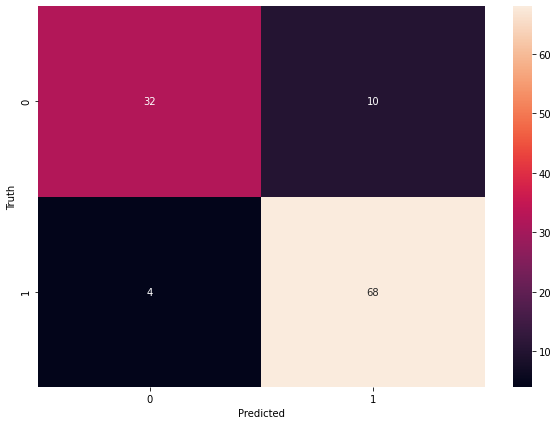

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(matrix,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [1]:
def GradBoost(model,X_train,y_train,X_test,boosting_rounds,learning_rate: float = 0.1):
    y_hat_train=np.repeat(np.mean(y_train),len(y_train))
    y_hat_test=np.repeat(np.mean(y_train),len(y_test))
    residuals=y_train-y_hat_train
    for i in range(0,boosting_rounds):
        model=model.fit(X_train,residuals)
        y_hat_train=y_hat_train+learning_rate*model.predict(X_train)
        y_hat_test=y_hat_test+learning_rate*model.predict(X_test)
        residuals=y_train-y_hat_train
    return y_hat_train,y_hat_test

In [32]:
# Synthetic dataset to apply Gradient Boost
from sklearn.datasets import make_regression
X,y=make_regression(n_samples=1000,n_features=20,n_informative=15,n_targets=1,
                   bias=0.0,noise=20,shuffle=True,random_state=13)
X_train=X[0:800]
y_train=y[0:800]

X_test=X[800:]
y_test=y[800:]

In [33]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(criterion='squared_error',max_depth=3)

In [34]:
mse_train=[]
n_rounds=np.arange(5,101,5)
for n_round in n_rounds:
    y_hat_train=GradBoost(model,
                         X_train,y_train,X_test,boosting_rounds=n_round,learning_rate=0.1)[0]
    print("Round #",n_round)
    mse_train.append(np.mean((y_train-y_hat_train)**2))
    

Round # 5
Round # 10
Round # 15
Round # 20
Round # 25
Round # 30
Round # 35
Round # 40
Round # 45
Round # 50
Round # 55
Round # 60
Round # 65
Round # 70
Round # 75
Round # 80
Round # 85
Round # 90
Round # 95
Round # 100


Text(0, 0.5, 'Training Mean Squared Error')

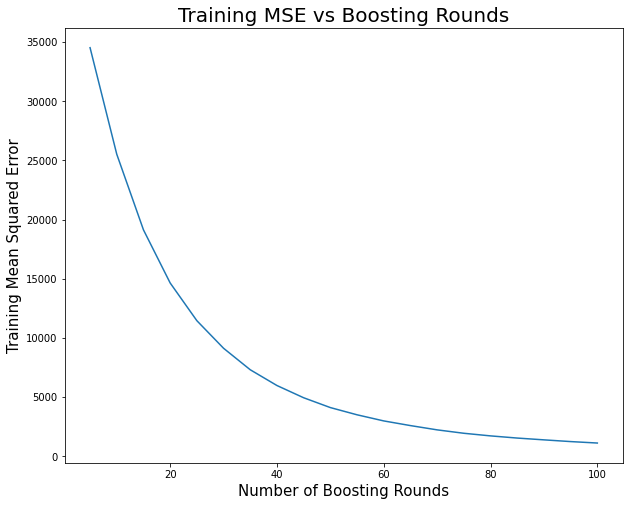

In [35]:
plt.rcParams['figure.figsize']=(10,8)
plt.plot(n_rounds,mse_train)
plt.title('Training MSE vs Boosting Rounds',fontsize=20)
plt.xlabel('Number of Boosting Rounds',fontsize=15)
plt.ylabel('Training Mean Squared Error',fontsize=15)

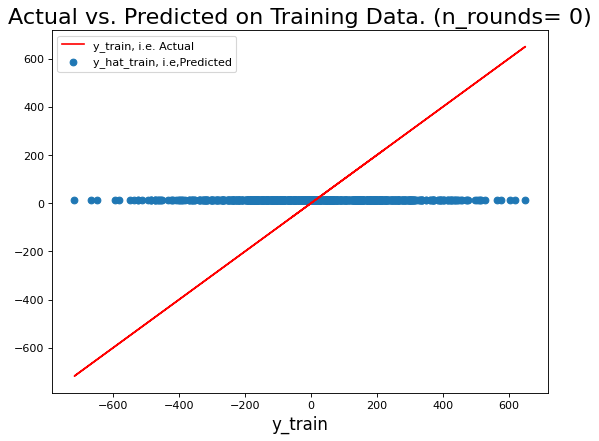

In [37]:
fig=plt.figure(figsize=(8,6),dpi=80,facecolor='w',edgecolor='k')
n_rounds=0
y_hat_train,y_hat_test=GradBoost(model,X_train,y_train,X_test,boosting_rounds=n_rounds,
                                learning_rate=0.1)
plt.scatter(y_train,y_hat_train,label='y_hat_train, i.e,Predicted')
plt.title('Actual vs. Predicted on Training Data. (n_rounds= '+str(n_rounds)+')',fontsize=20)
plt.xlabel('y_train',fontsize=15)
plt.plot(y_train,y_train,color='r',label='y_train, i.e. Actual')
plt.legend()

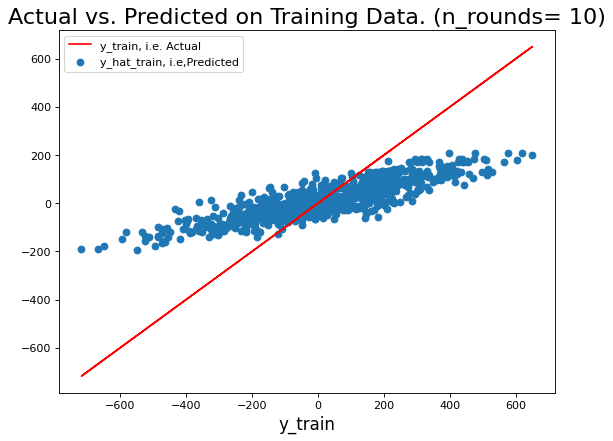

In [38]:
fig=plt.figure(figsize=(8,6),dpi=80,facecolor='w',edgecolor='k')
n_rounds=10
y_hat_train,y_hat_test=GradBoost(model,X_train,y_train,X_test,boosting_rounds=n_rounds,
                                learning_rate=0.1)
plt.scatter(y_train,y_hat_train,label='y_hat_train, i.e,Predicted')
plt.title('Actual vs. Predicted on Training Data. (n_rounds= '+str(n_rounds)+')',fontsize=20)
plt.xlabel('y_train',fontsize=15)
plt.plot(y_train,y_train,color='r',label='y_train, i.e. Actual')
plt.legend()


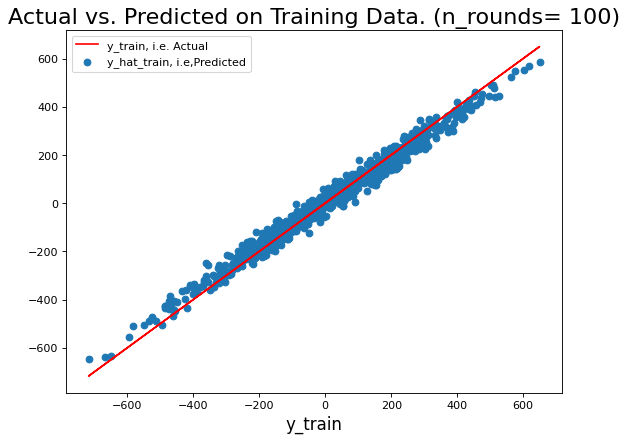

In [39]:
fig=plt.figure(figsize=(8,6),dpi=80,facecolor='w',edgecolor='k')
n_rounds=100
y_hat_train,y_hat_test=GradBoost(model,X_train,y_train,X_test,boosting_rounds=n_rounds,
                                learning_rate=0.1)
plt.scatter(y_train,y_hat_train,label='y_hat_train, i.e,Predicted')
plt.title('Actual vs. Predicted on Training Data. (n_rounds= '+str(n_rounds)+')',fontsize=20)
plt.xlabel('y_train',fontsize=15)
plt.plot(y_train,y_train,color='r',label='y_train, i.e. Actual')
plt.legend()

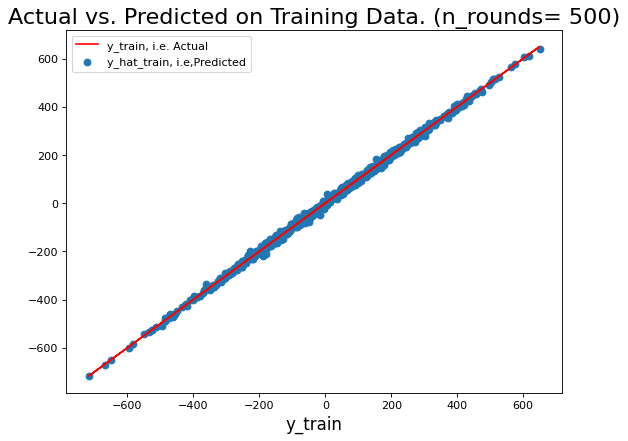

In [40]:
fig=plt.figure(figsize=(8,6),dpi=80,facecolor='w',edgecolor='k')
n_rounds=500
y_hat_train,y_hat_test=GradBoost(model,X_train,y_train,X_test,boosting_rounds=n_rounds,
                                learning_rate=0.1)
plt.scatter(y_train,y_hat_train,label='y_hat_train, i.e,Predicted')
plt.title('Actual vs. Predicted on Training Data. (n_rounds= '+str(n_rounds)+')',fontsize=20)
plt.xlabel('y_train',fontsize=15)
plt.plot(y_train,y_train,color='r',label='y_train, i.e. Actual')
plt.legend()

In [1]:
# WEEK - 11

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs


In [5]:
# K-Means clustering algorithm
# Input: n-training examples represented with m features, 
# Number of centroids: k
cluster_count = 3

In [6]:
?make_blobs

In [32]:
X=make_blobs(n_samples=100,n_features=2,centers=3,cluster_std=1,
            random_state=42)

In [33]:
X=X[0]
X.shape

(100, 2)

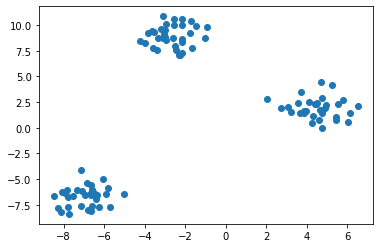

In [34]:
plt.scatter(X[:,0],X[:,1])

In [35]:
# Algorithm:
# Randomly intialize k centroids. Note that each centroid is a vector in m dimensional space.
# Repeat until convergence:
# - Assign points to the closest centroids
# - Calculate the centroids based on the points assigned to the cluster

In [36]:
def fit(X,k):
    centroids=X[np.random.randint(0,X.shape[0],size=k)]
    labels=np.argmin(cdist(X,centroids),axis=1)
    for _iteration in range(10):
        previous_labels=labels.copy()
        centroids=np.array([np.mean(X[labels==r],axis=0) for r in range(k)])
        labels = np.argmin(cdist(X,centroids),axis=1)
        if all(labels==previous_labels):
            break
    return centroids,labels

In [37]:
centroids,labels=fit(X,cluster_count)

In [39]:
print("Centroids :",centroids)

Centroids : [[-2.66780392  8.93576069]
 [-6.95170962 -6.67621669]
 [ 4.49951001  1.93892013]]


In [40]:
def plot_kmeans(X,centroids,labels,rseed=0,ax=None):
    ax=ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:,0],X[:,1],c=labels,s=40,cmap="plasma",zorder=2)
    radii=[cdist(X[labels==i],[center]).max() for
          i,center in enumerate(centroids)]
    for c,r in zip(centroids,radii):
        ax.add_patch(plt.Circle(c,r,fc="#CCCCCC",lw=5,alpha=0.2,zorder=1))

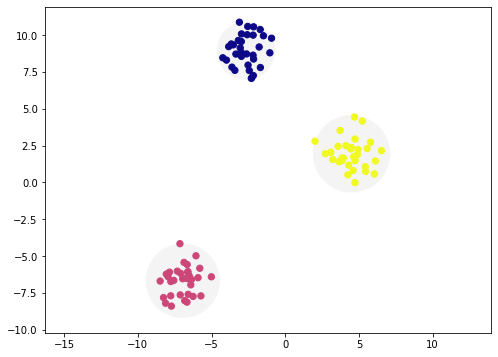

In [45]:

plt.figure(figsize=(8,6))
plot_kmeans(X,centroids,labels)

In [46]:
# Implement elbow_method for finding optimal k.
# Implement silhoutte for finding optimal k

In [48]:
def silhoutte(a,b):
    s= (a*b)/max(a,b)
    return s

In [49]:
def centroid(a,b):
    c=[]
    count = a.shape[0]
    for i in range(count):
        c.append((a[i]+b[i])/2)
    return np.array(c)

In [1]:
# WEEK - 12

In [1]:
import numpy as np
seed=42
np.random.seed(seed)

In [2]:
# Net work class:
# We shall write the network class. The two methods that are indispensable for any ML class are:
# fit , predict
# Fitting a neural network model requires us to compute two passes on the data:
# forward, backward
# We need to start at some place by initializing the network and various hyperparameters and this requires an init method:
# init
# In most of these methods, we would have to take the help of certain helper functions:
# activations
# losses
# This is the process. But we will work it in the reverse order so that each step of the process does not have any forward references:
# helpers -> init -> forward -> backward -> fit -> predict
# The skeleton of the class is given in the code block that follows.

In [3]:
class Network: 
    def init(self,layers,activation_choice='relu',output_choice='softmax',loss_choice='cce'):
        pass
    def forward(self,X):
        pass
    def backward(self,Y,Y_hat):
        pass
    def predict(self,X):
        pass
    

In [4]:
# Activation functions
# Sigmoid
def sigmoid(z):
    return 1/(1+np.exp(z))
# ReLU - simple piecewise function
def relu(z):
    return np.where(z>=0,z,0)
def grad_sigmoid(z):
    return sigmoid(z)*(1-sigmoid(z))
def grad_relu(z):
    return np.where(z>=0,1,0)
# A dictionary of activation functions will be used while initializing the network
hidden_act={'sigmoid':sigmoid,'relu':relu}
grad_hidden_act={'sigmoid':grad_sigmoid,'relu':grad_relu}

In [5]:
# Output layer
# Only 2 activation functions:
# For regression- use identity function
# For classification - use softmax regression
def identity(z):
    return z
def softmax(z):
    assert z.ndim==2
    z-=z.max(axis=1,keepdims=True)# to avoid overflow
    prob=np.exp(z)/np.exp(z).sum(axis=1,keepdims=True)
    assert np.allclose(prob.sum(axis=1),np.ones(z.shape[0]))
    return  prob
output_act={'softmax':softmax,'identity':identity}

In [6]:
# Loss:
# Two types of losses - regression,classification
# Least Square
def least_square(y,y_hat):
    return 0.5*np.sum((y-y_hat)*(y-y_hat))
# Categorical cross entropy
# L(Y,Y^)=-(1_n)^T(Y (.) log(Y^))(1_k)
def cce(Y,Y_hat):
    return -np.sum(Y*np.log(Y_hat))
losses={'least_square':least_square,'cce':cce}

In [7]:
# Initialization:
# Here, we look at two parts:
# Network architecture,
# Weight initialization

In [8]:
# Network architecture:
# The following components mainly determine the structure of the network:
# no.of layers
# no.of neurons per layer
# We will use l for indexing of layers. The network has L layers in all,
# l=0: input layer
# 1<=l<=L-1  : Hidden Layers
# l=L: Output layer
# We shall represent the number of layers and neurons using a list layers. The variable L
# will never make an explicit appearance anywhere, instead we will use range(len(layers)) to iterate through the layers
# One useful task is to compute the total no.of parameters in the network. This will come in handy later on.

In [9]:
def count_params(layers):
    num_params=0
    for l in range(1,len(layers)):
        num_weights=layers[l-1]*layers[l]
        num_biases=layers[l]
        num_params+=(num_weights+num_biases)
    return num_params

In [10]:
assert count_params([64,5,10])==(64*5+5)+(5*10+10)

In [11]:
# Parameter initialization:
# The weight matrix at layer l has size layers[l-1]Xlayers[l]. The bias
# at layer l is a vector of size layers[l]. We will store all these weights  in a list W
#of the same size as layers.W[l] would correspond to Wl. Since there are L weight matrices,
# W[0] would be set to None. Recall that the size of the list is L+1. A similar list would be 
#  required for b.
# To make the gradient descent update simpler, it would be useful to h ave a  master vector, theta that has
# a reference to all the parameters in the network. We will do the same for the gradients theta(g).
# So whenever theta is updated,the weights W_l will also be updated and vice-versa.
# One way to do this is to first start with the master vector and then reshape chunks of it, into the 
# dimensions of a weight matrix. Reshaping an array  returns a view of an array and not a copy. To understand,
# this function better, refer to numpy's documentation on Copies and Views.

In [12]:
def init_params(layers):
    num_params=count_params(layers)
    W=[None for _ in range(len(layers))]
    b=[None for _ in range(len(layers))]
    gW=[None for _ in range(len(layers))]
    gb=[None for _ in range(len(layers))]
    
    theta=rng.standard_normal(num_params)
    gtheta=np.zeros(num_params)
    start,end=0,0
    for l in range(1,len(layers)):
        end=start+layers[l-1]*layers[l]
        W[l]=theta[start:end].reshape(layers[l-1],layers[l])
        gW[l]=gtheta[start:end].reshape(layers[l-1],layers[l])
        start,end=end,end+layers[l]
        b[l]=theta[start:end].reshape(layers[l])
        gb[l]=gtheta[start:end].reshape(layers[l])
        start=end
    return theta,gtheta,W,b,gW,gb

In [13]:
from numpy import random as rng
layers=[64,32,10]
params=init_params(layers)
for l in range(1,len(layers)):
    assert params[2][l].base is params[0]
    assert params[3][l].base is params[0]
    assert params[4][l].base is params[1]
    assert params[5][l].base is params[1]

In [27]:
def init(self,layers,activation_choice='relu',output_choice='softmax',
        loss_choice='cce'):
    self.layers=layers
    self.theta,self.gtheta,self.W,self.b,self.gW,self.gb=init_params(layers)
    self.ghid=hidden_act[activation_choice]
    self.grad_ghid=grad_hidden_act[activation_choice]
    self.gout=output_act[output_choice]
    self.loss=losses[loss_choice]
    

In [16]:
def forward(self,X):
    self.Z=[None for _ in range(len(self.layers))]
    self.A=[None for _ in range(len(self.layers))]
    self.A[0]=X
    self.Z[0]=X
    for l in range(1,len(self.layers)):
        self.Z[l]=self.A[l-1]@self.W[l]+self.b[l]
        self.A[l]=self.ghid(self.Z[l])
    self.A[-1]=self.gout(self.Z[-1])
    return self.A[-1]

In [17]:
# Similarly backward pass
def backward(self,Y,Y_hat):
    gZ=[None for _ in range(len(self.layers))]
    gA=[None for _ in range(len(self.layers))]
    gZ[-1]=Y_hat-Y
    for l in range(len(self.layers)-1,0,-1):
        self.gW[l][:,:]=self.A[l-1].T@gZ[l]
        self.gb[l][:]=np.sum(gZ[l].T,axis=1)
        gA[l-1]=gZ[l]@self.W[l].T
        gZ[l-1]=gA[l-1]*self.grad_ghid(self.Z[l-1])
    

In [19]:
def fit(self,X,Y,lr=0.01,epochs=100,batch_size=100):
    self.losses=[]
    for epoch in range(epochs):
        Y_hat=self.forward(X)
        self.losses.append(self.loss(Y,Y_hat))
        indices=np.arange(X.shape[0])
        rng.shuffle(indices)
        X,Y=X[indices],Y[indices]
        num_batches=X.shape[0]//batch_size
        for b in range(num_batches):
            Xb=X[b*batch_size:(b+1)*batch_size]
            Yb=Y[b*batch_size:(b+1)*batch_size]
            Y_hat_b=self.forward(Xb)
            self.backward(Yb,Y_hat_b)
            self.theta-=lr*self.gtheta

In [20]:
def predict(self,X):
    Y_hat=self.forward(X)
    if X.shape[-1]==1:
        return Y_hat
    else:
        return np.argmax(Y_hat,axis=1)

In [28]:
Network.__init__=init
Network.forward=forward
Network.backward=backward
Network.fit=fit
Network.predict=predict

Sample image with label 0
(1797, 8, 8)


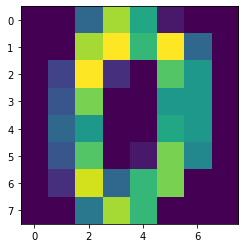

In [29]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits=load_digits()
X=digits.images
X/=np.max(X)
y=digits.target
plt.imshow(X[0])
print(f"Sample image with label {y[0]}")
print(X.shape)
X=X.reshape(-1,64)
isize=X.shape[-1]
osize=len(np.unique(y))


In [30]:
def onehot_encoder(y):
    k=len(np.unique(y))
    return np.eye(k)[y]

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=seed)

In [32]:
Y_train=onehot_encoder(y_train)
Y_test=onehot_encoder(y_test)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(1078, 64) (1078, 10)
(719, 64) (719, 10)


Test-data size =719
Accuracy =9.32
Number of parameters =2410


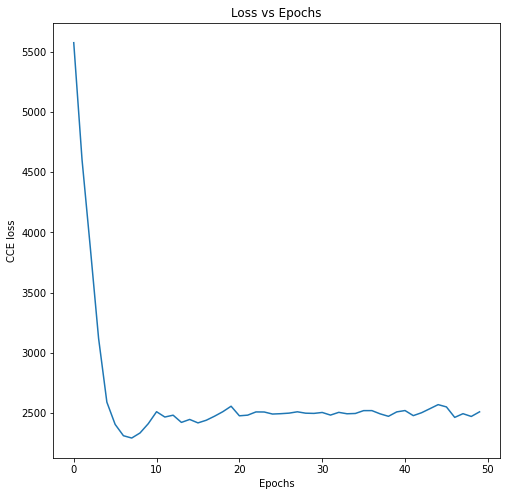

In [33]:
layers=[isize,32,osize]
network=Network(layers,activation_choice='sigmoid',output_choice='softmax',
               loss_choice='cce')
epochs=50
network.fit(X_train,Y_train,lr=0.01,epochs=epochs,batch_size=10)
plt.figure(figsize=(8,8))
plt.plot(range(epochs),network.losses)
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('CCE loss')
accuracy=np.sum(network.predict(X_test)==y_test)/X_test.shape[0]*100
print(f'Test-data size ={X_test.shape[0]}')
print(f'Accuracy ={accuracy:.2f}')
print(f'Number of parameters ={count_params(layers)}')